Step 1 - Import python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


Step 2 - Load and read the data file
1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change the file name ("COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/COVID_samples.tsv')
df

,sample,Hospitalization,sample_name,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved
0,6232BW_TCRB,Y,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01
1,6232BW_TCRB,Y,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01
2,6232BW_TCRB,Y,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01
3,6232BW_TCRB,Y,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01
4,6232BW_TCRB,Y,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01
...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,N,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01
15061644,1566265BW_TCRB,N,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01
15061645,1566265BW_TCRB,N,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02
15061646,1566265BW_TCRB,N,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01


Step 2 - Option 2 - Upload data file from local computer


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving complete_samples.tsv to complete_samples.tsv


In [ ]:
import io

#change the file name ("COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [ ]:
#change the file name ("COVID_samples.tsv") to your file name to load the data
df = pd.read_table('downloads/covid_data/COVID_samples.tsv', sep = '\t')
df

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [ ]:
df.drop('sample_name', axis=1, inplace=True)
df.columns = ['sample', 'hospitalization' , 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j']
df

,sample,hospitalization,freq,#count,cdr3aa,cdr3nt,v,d,j
0,6232BW_TCRB,Y,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01
1,6232BW_TCRB,Y,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01
2,6232BW_TCRB,Y,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01
3,6232BW_TCRB,Y,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01
4,6232BW_TCRB,Y,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,N,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01
15061644,1566265BW_TCRB,N,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01
15061645,1566265BW_TCRB,N,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02
15061646,1566265BW_TCRB,N,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01


Motif analysis 1 - Amino acid spectratype

In [ ]:
#add CDR3 amino acid length as a new column
df['aa_length'] = df['cdr3aa'].str.len()

df_aa_spectratype=df.groupby(['sample','hospitalization','aa_length'], as_index=False)['freq'].agg({'spectratype':'sum'})
df_aa_spectratype

,sample,hospitalization,aa_length,spectratype
0,1132289BW_TCRB,N,1,0.000001
1,1132289BW_TCRB,N,2,0.000001
2,1132289BW_TCRB,N,3,0.000001
3,1132289BW_TCRB,N,4,0.000017
4,1132289BW_TCRB,N,5,0.000013
...,...,...,...,...
1188,989003BW_TCRB,Y,23,0.000224
1189,989003BW_TCRB,Y,24,0.000082
1190,989003BW_TCRB,Y,25,0.000059
1191,989003BW_TCRB,Y,26,0.000017


Motif analysis 1.1 - Show the most frequent amino acid length in each sample

In [ ]:
df_aa_max_spectratype = df_aa_spectratype.loc[df_aa_spectratype.groupby('sample')['spectratype'].idxmax()]
df_aa_max_spectratype

,sample,hospitalization,aa_length,spectratype
13,1132289BW_TCRB,N,14,0.193850
40,1222568BW_TCRB,N,15,0.190543
65,1337122BW_TCRB,N,14,0.243901
90,1445BW_TCRB,N,14,0.220508
116,1564208BW_TCRB,N,14,0.186892
141,1566265BW_TCRB,N,14,0.201397
167,1566319BW_TCRB,N,15,0.196720
192,1566426BW_TCRB,N,15,0.207125
218,1566449BW_TCRB,N,15,0.182232
244,1566486BW_TCRB,N,15,0.179339


Motif analysis 1.2 - Amino acid motif count (result table)

In [ ]:
#define the function to count amino acid motifs (k is the length of the motif)
def aamotif(k, aa_list):
  aamotifCount={}
  for aa in aa_list:
    for i in range(len(aa)-k+1):
      aamotif = aa[i:i+k]
      aamotifCount [aamotif] = aamotifCount.get(aamotif,0)+1
  return aamotifCount 

#create an empty dataframe for storing results
df_aa_motif = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

  #store the rows related to the sample 
  df_temp = df.loc[df['sample'] == sample]

  #use amino acid motif length of 6 as an example
  df_temp = aamotif(6, df_temp['cdr3aa'])
  df_temp = pd.DataFrame(df_temp.items(), columns=['motif', 'count'])
  df_temp['sample'] = sample

  #append the dataframe based on amino acid motifs and stores in the result dataframe
  df_aa_motif = df_aa_motif.append(df_temp, ignore_index=True) 

  #add the hospitalization information as a column
  df_aa_motif_1 = df_aa_motif.merge(df_aa_max_spectratype[['sample','hospitalization']], on='sample')

df_aa_motif_1

,motif,count,sample,hospitalization
0,CASSLL,2969,1566622BW_TCRB,N
1,ASSLLA,539,1566622BW_TCRB,N
2,SSLLAG,382,1566622BW_TCRB,N
3,SLLAGE,24,1566622BW_TCRB,N
4,LLAGET,10,1566622BW_TCRB,N
...,...,...,...,...
38430039,SSRIRA,1,5876BW_TCRB,N
38430040,SRIRAQ,1,5876BW_TCRB,N
38430041,RIRAQY,1,5876BW_TCRB,N
38430042,IRAQYG,1,5876BW_TCRB,N


Motif analysis 1.3 - Amino acid motif count (plots)

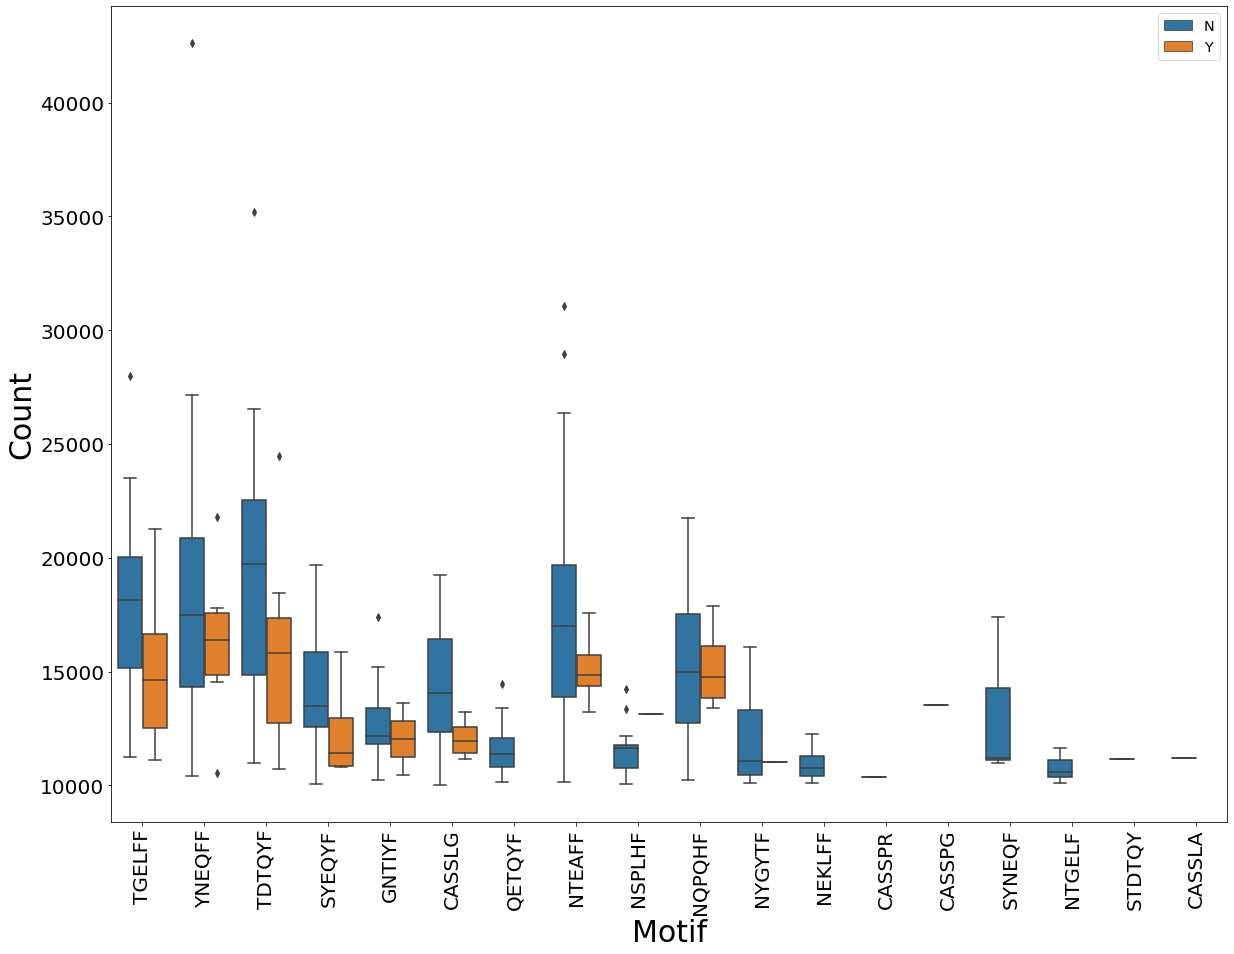

In [ ]:
#remove motif counts that are less than 10000
df_aa_motif_1 = df_aa_motif_1[df_aa_motif_1['count'] > 9999]

ax = plt.subplots(figsize = (20,15))
ax = sns.boxplot(data=df_aa_motif_1,x='motif',y='count',hue='hospitalization')
plt.xticks(rotation=90)
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

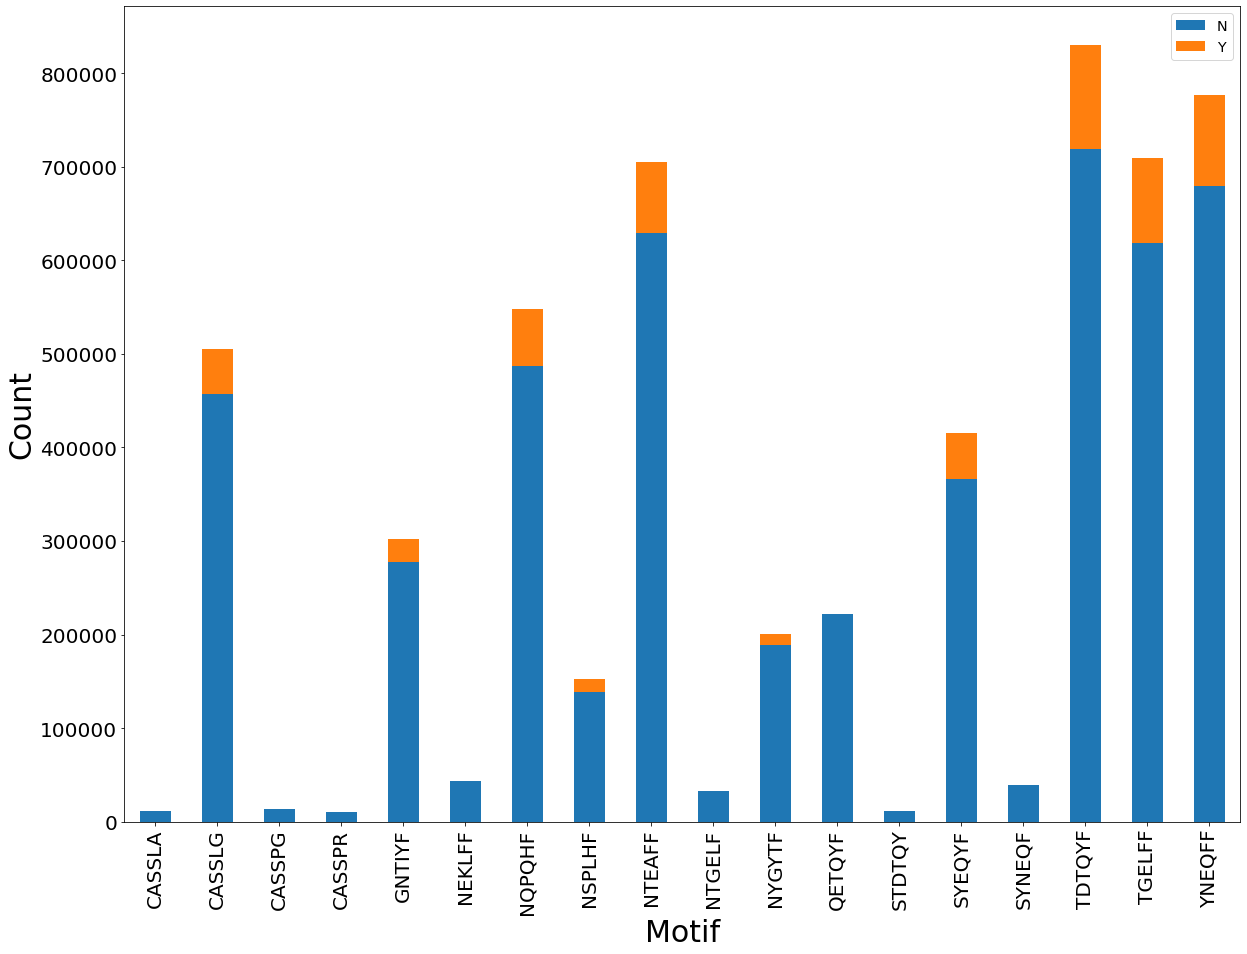

In [ ]:
#remove motif counts that are less than 10000
df_aa_motif_1 = df_aa_motif_1[df_aa_motif_1['count'] > 9999]

ax = df_aa_motif_1.groupby(['motif','hospitalization'])['count'].sum().unstack().plot(kind='bar', stacked=True,figsize=(20,15))
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

Motif analysis 2.1 - nucleotide sequence motif analysis (result table)

In [ ]:
#define the function to count nucleotide motifs (k is the length of the motif)
def ntmotif(k, nt_list):
  ntmotifCount={}
  for nt in nt_list:
    for i in range(len(nt)-k+1):
      ntmotif = nt[i:i+k]
      ntmotifCount [ntmotif] = ntmotifCount.get(ntmotif,0)+1
  return ntmotifCount

#create an empty dataframe for storing results
df_nt_motif = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

  #store the rows related to the sample 
  df_temp = df.loc[df['sample'] == sample]

  #use amino acid motif length of 6 as an example
  df_temp = ntmotif(6, df_temp['cdr3nt'])
  df_temp = pd.DataFrame(df_temp.items(), columns=['motif', 'count'])
  df_temp['sample'] = sample

  #append the dataframe based on amino acid motifs and stores in the result dataframe
  df_nt_motif = df_nt_motif.append(df_temp, ignore_index=True) 

  #add the hospitalization information as a column
  df_nt_motif_1 = df_nt_motif.merge(df_aa_max_spectratype[['sample','hospitalization']], on='sample')
  
df_nt_motif_1

,motif,count,sample,hospitalization
0,GCGTCT,2641,1566622BW_TCRB,N
1,CGTCTG,2252,1566622BW_TCRB,N
2,GTCTGC,9503,1566622BW_TCRB,N
3,TCTGCT,19231,1566622BW_TCRB,N
4,CTGCTG,19331,1566622BW_TCRB,N
...,...,...,...,...
197985,NTGGCG,1,5876BW_TCRB,N
197986,NTGAGG,1,5876BW_TCRB,N
197987,NTCTCT,1,5876BW_TCRB,N
197988,NNTGTA,1,5876BW_TCRB,N


Motif analysis 2.2 - Show the motif counts across the samples by bar plots 

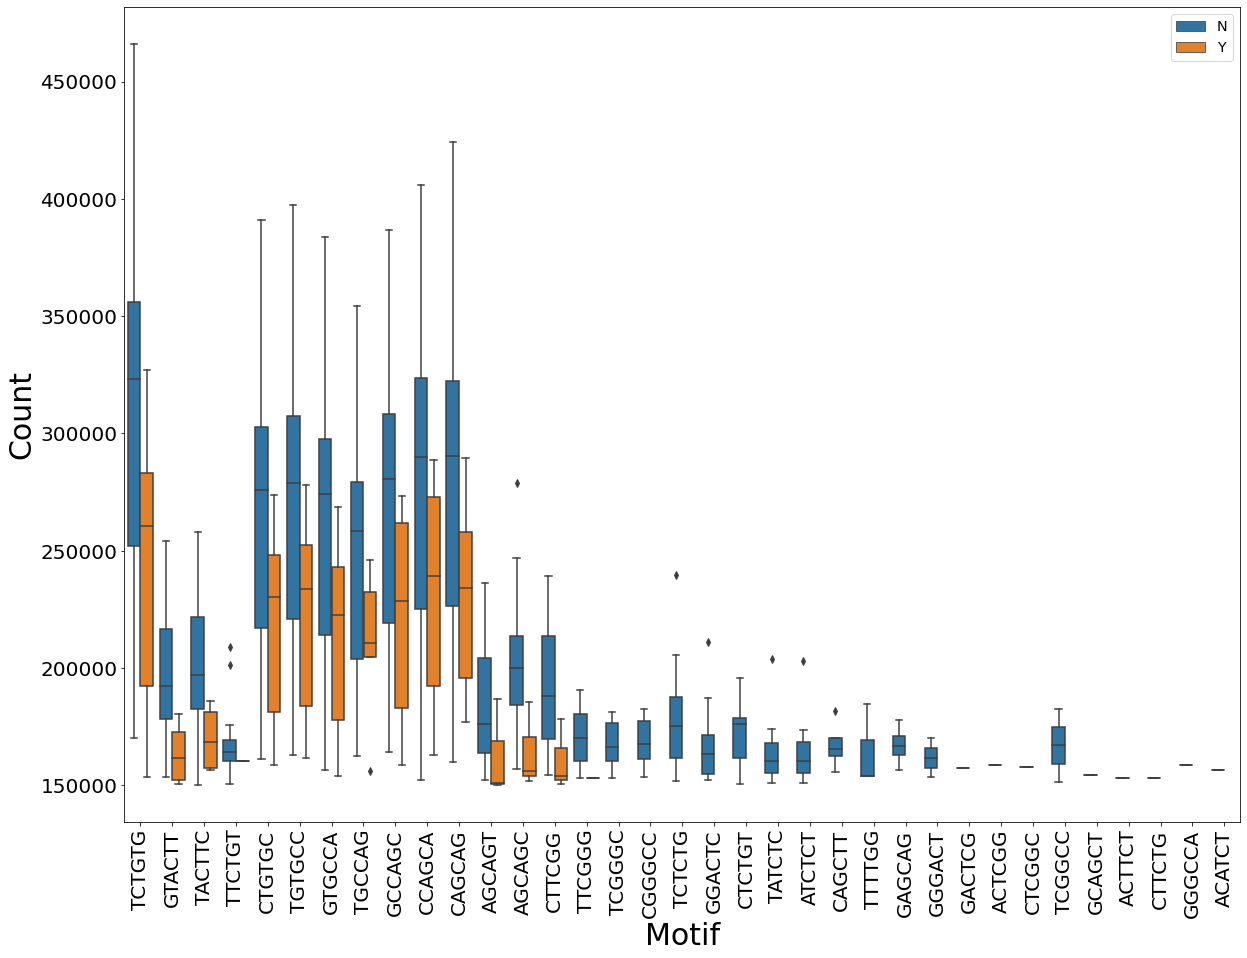

In [ ]:
#remove motif counts that are less than 150000
df_nt_motif_1 = df_nt_motif_1[df_nt_motif_1['count'] > 149999]

ax = plt.subplots(figsize = (20,15))
ax = sns.boxplot(data=df_nt_motif_1,x='motif',y='count',hue='hospitalization')
plt.xticks(rotation=90)
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

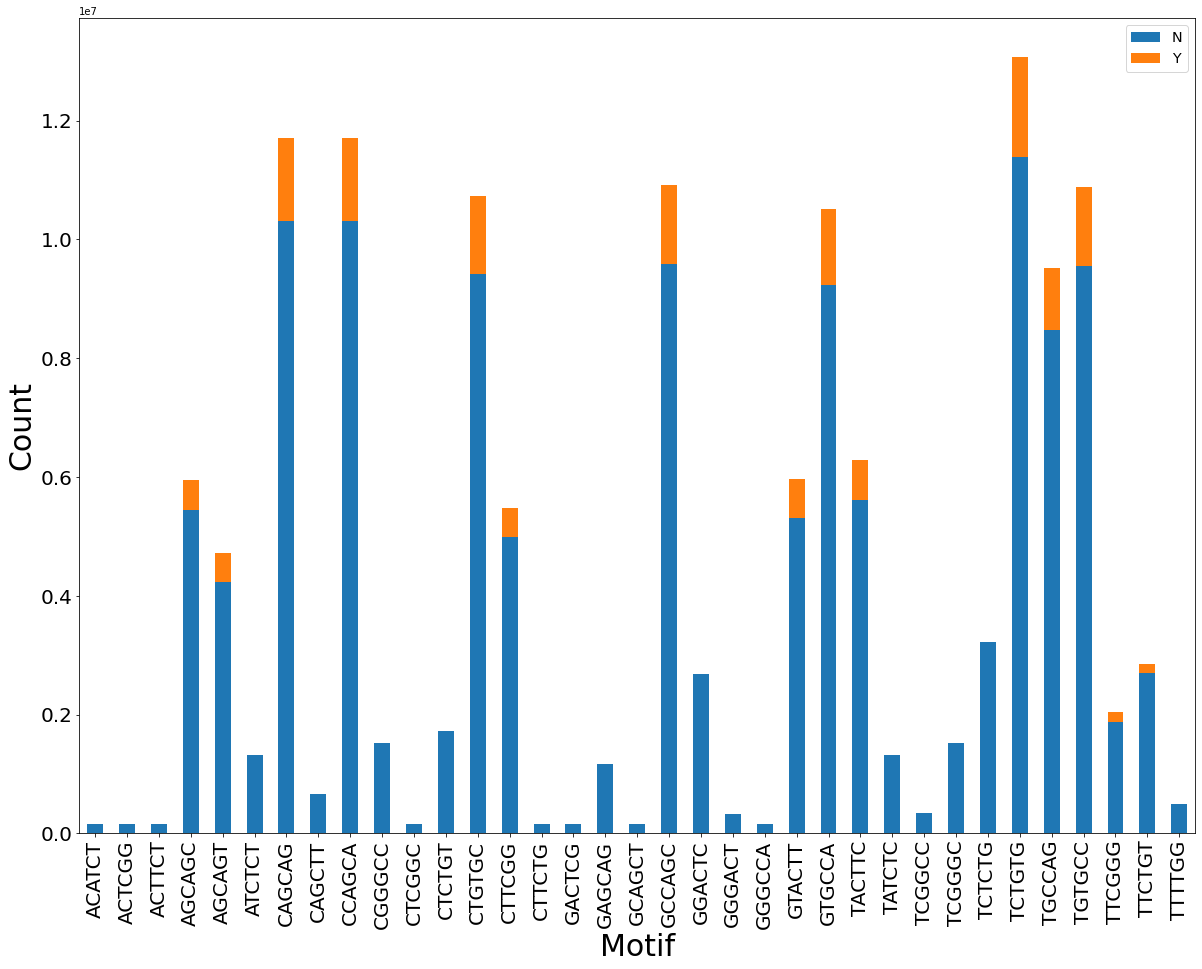

In [ ]:
#remove motif counts that are less than 150000
df_nt_motif_1 = df_nt_motif_1[df_nt_motif_1['count'] > 149999]

ax = df_nt_motif_1.groupby(['motif','hospitalization'])['count'].sum().unstack().plot(kind='bar', stacked=True,figsize=(20,15))
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')